<a href="https://colab.research.google.com/github/jcdevaney/data71200f25/blob/main/oct21/data71200oct21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbors

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# k-Nearest Neigbors Classification
#### class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

In [34]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset.data, iris_dataset.target, stratify=iris_dataset.target, random_state=66,test_size=0.2)

In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# k = 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_train, y_train)))
knn.predict(X_train)

knn score: 0.9583333333333334


array([0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 1, 1, 0, 2, 1, 2])

In [38]:
y_train

array([0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 1, 1, 0, 2, 2, 2])

### Comparing different values for k

In [46]:
# create a validation split

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X_train, y_train, stratify=y_train, random_state=9,test_size=0.2)

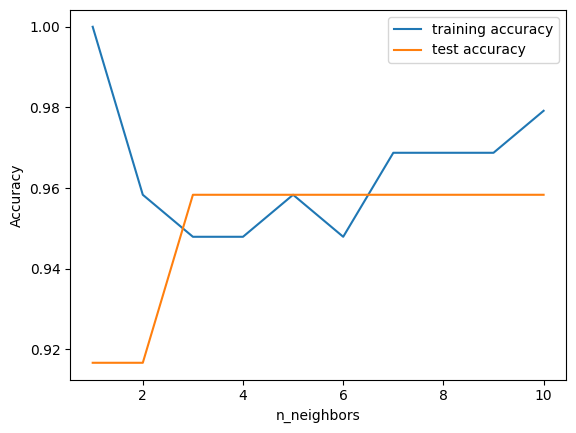

In [47]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_val, y_train_val)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train_val, y_train_val))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test_val, y_test_val))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Manhattan Distance (versus the default Minkowski distance tuned to act like Euclidean Distance)

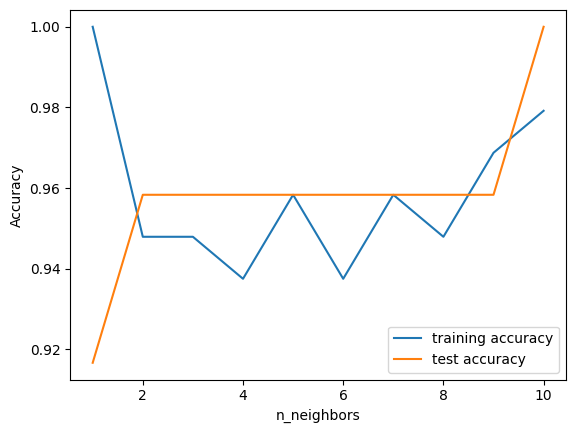

In [48]:
# From documentation (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
#    pfloat, default=2
#        Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. This parameter is expected to be positive.
#
#    metricstr or callable, default=’minkowski’
#        Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2. See the documentation of scipy.spatial.distance and the metrics listed in distance_metrics for valid metric values.


# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    knn.fit(X_train_val, y_train_val)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train_val, y_train_val))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test_val, y_test_val))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Weighted with inverse of distance (versus the default uniform weighting)

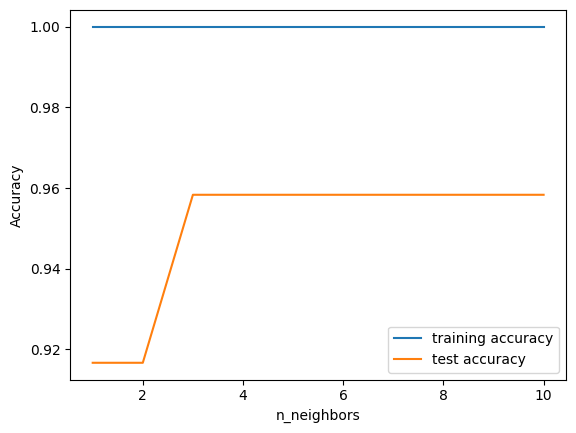

In [49]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,weights='distance')
    knn.fit(X_train_val, y_train_val)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train_val, y_train_val))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test_val, y_test_val))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Experimenting with changing the algorithm to compute nearest neighbors (‘ball_tree’, ‘kd_tree’ ,‘brute’,'auto)

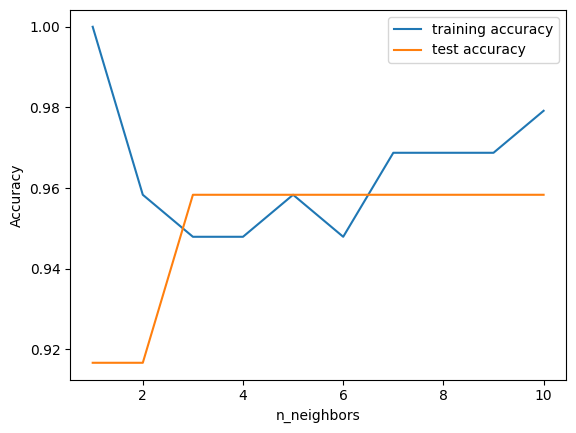

In [52]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm="kd_tree")
    knn.fit(X_train_val, y_train_val)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train_val, y_train_val))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test_val, y_test_val))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Cross Validation

In [53]:
# cross validation on all of the data

# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores_all = cross_val_score(knn_cv, iris_dataset.data, iris_dataset.target, cv=5)

print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all)))

cv_scores:
[0.96666667 0.96666667 0.96666667 0.96666667 1.        ]
cv_scores mean:
0.9733333333333334


In [54]:
# cross validation on just training set

# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[1.         0.875      0.95833333 0.95833333 0.95833333]
cv_scores mean:
0.95


### Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV

# parameter validation on training set

knn2 = KNeighborsClassifier()

#dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 25)}

#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [56]:
#best performing k (on training set)
knn_gscv.best_params_

{'n_neighbors': np.int64(8)}

In [57]:
#accuracy of best performing k
knn_gscv.best_score_

np.float64(0.975)

In [ ]:
# full cross valiadation results from grid search
knn_gscv.cv_results_

{'mean_fit_time': array([0.00173578, 0.000844  , 0.00086565, 0.00078092, 0.00090704,
        0.00113668, 0.00198035, 0.00185285, 0.00077767, 0.0016036 ,
        0.00271988, 0.0017221 , 0.00172791, 0.00126805, 0.00127263,
        0.00110068, 0.0008872 , 0.00081577, 0.00216789, 0.00139933,
        0.00086241, 0.00089579, 0.00130262, 0.00088162]),
 'std_fit_time': array([9.18302324e-04, 5.58720091e-05, 9.09701577e-05, 4.02797870e-05,
        5.14318336e-05, 2.20515178e-04, 2.02729742e-03, 2.09170735e-03,
        6.26505598e-05, 1.14758703e-03, 2.50858450e-03, 8.67672696e-04,
        1.03426859e-03, 8.11116918e-04, 8.07239249e-04, 5.32104433e-04,
        5.63605384e-05, 1.13468670e-04, 1.03755459e-03, 8.62708375e-04,
        6.86179109e-05, 6.40155261e-05, 8.00607410e-04, 7.13819652e-05]),
 'mean_score_time': array([0.00417542, 0.00196691, 0.00194716, 0.00227647, 0.00225387,
        0.00281415, 0.00398712, 0.00382981, 0.00481572, 0.00397286,
        0.00568247, 0.00592384, 0.00329385, 0.00

In [58]:
# accuracy of k = 8 on testing data (#1)
knn8 = KNeighborsClassifier(n_neighbors=8)
knn8.fit(X_train, y_train)
print("knn score: {}".format(knn8.score(X_test, y_test)))

knn score: 0.9666666666666667


In [62]:
# accuracy of k = 11 on testing data (lowest number tied for #2)
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X_train, y_train)
print("knn score: {}".format(knn11.score(X_test, y_test)))

knn score: 0.9666666666666667


In [63]:
# accuracy of k = 4 on testing data (lowest number tied for #4 not a multiple of the class)
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train, y_train)
print("knn score: {}".format(knn4.score(X_test, y_test)))

knn score: 1.0


### Metrics other than accuracy

In [64]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn8.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [65]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn11.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [66]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn4.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [67]:
# precision, recall, f1-score, plus support (number of instances of class)
from sklearn.metrics import classification_report
print(classification_report(y_test, knn8.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       1.00      0.90      0.95        10
     class 3       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn11.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       1.00      0.90      0.95        10
     class 3       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn4.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       1.00      1.00      1.00        10
     class 3       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## k-Nearest Neigbors Regression

#### class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

In [70]:
# Import the California Housing Data from used in the HOML book, Chapter 2

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [71]:
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

/tmp/ipython-input-4227877643.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [72]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

housing = load_housing_data()

y = housing['median_house_value']
X = housing.drop(['median_house_value','ocean_proximity','total_bedrooms'],axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=0)

In [73]:
from sklearn.neighbors import KNeighborsRegressor
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=3)

### Evaluation Metrics

In [74]:
#https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

print("Test set R^2: {:.2f}".format(reg.score(X_test2, y_test2)))

Test set R^2: 0.10


In [75]:
from sklearn.metrics import mean_squared_error
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test2, reg.predict(X_test2))))

Test set RMSE: 11845547034.66


In [76]:
from sklearn.metrics import mean_absolute_error
print("Test set MSE: {:.2f}".format(mean_absolute_error(y_test2, reg.predict(X_test2))))

Test set MSE: 83260.22
